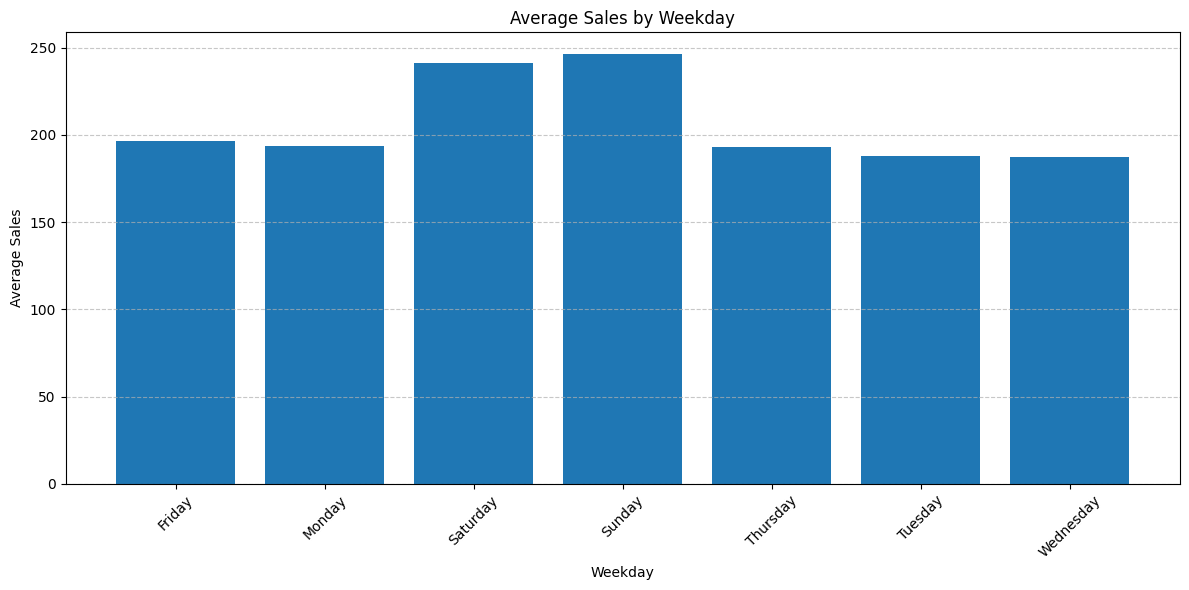

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Read the dataset
df = pd.read_csv('../data/external/umsatzdaten_gekuerzt.csv')

# Convert date column to datetime and extract weekday
df['Datum'] = pd.to_datetime(df['Datum'])
df['Weekday'] = df['Datum'].dt.day_name()

# Calculate mean sales per weekday
weekday_means = df.groupby('Weekday')['Umsatz'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(weekday_means.index, weekday_means.values)

# Customize the plot
plt.title('Average Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

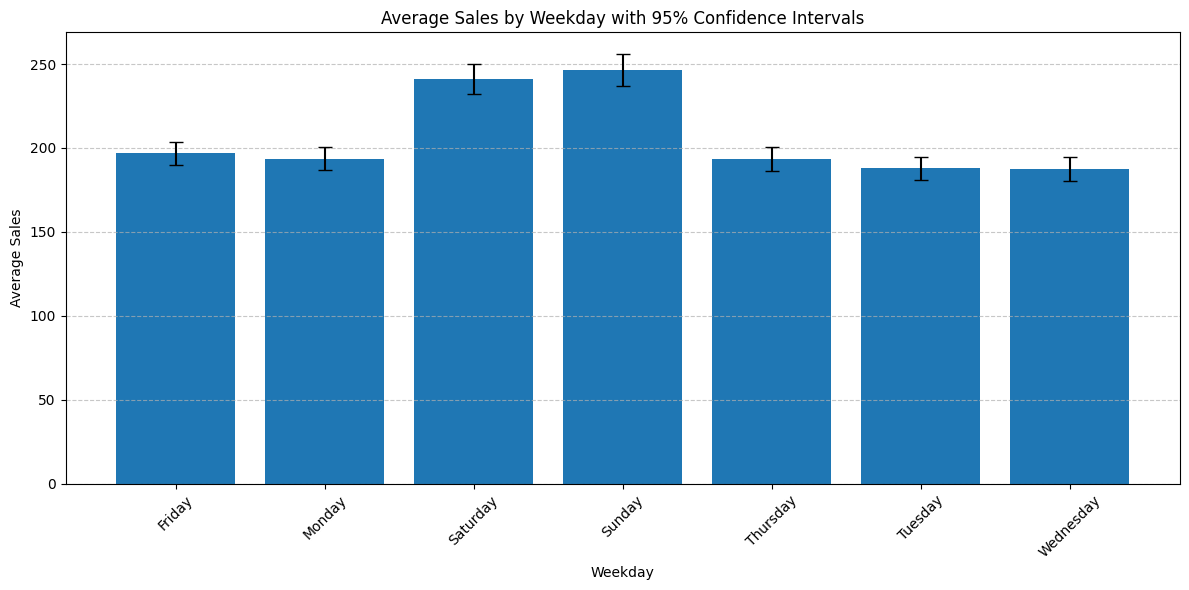

In [ ]:
# Calculate confidence intervals
def confidence_interval(data):
    confidence = 0.95
    degrees_of_freedom = len(data) - 1
    mean = np.mean(data)
    std_err = stats.sem(data)
    t_value = stats.t.ppf((1 + confidence) / 2, degrees_of_freedom)
    margin_of_error = t_value * std_err
    return mean - margin_of_error, mean + margin_of_error

weekday_ci = df.groupby("Weekday").agg({"Umsatz": confidence_interval})
weekday_ci = pd.DataFrame(
    weekday_ci["Umsatz"].tolist(),
    index=weekday_ci.index,
    columns=["ci_lower", "ci_upper"],
)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(weekday_means.index, weekday_means.values)

# Add error bars for confidence intervals
plt.errorbar(
    x=range(len(weekday_means)),
    y=weekday_means.values,
    yerr=[
        (weekday_means - weekday_ci["ci_lower"]),
        (weekday_ci["ci_upper"] - weekday_means),
    ],
    fmt="none",
    color="black",
    capsize=5,
)

# Customize the plot
plt.title("Average Sales by Weekday with 95% Confidence Intervals")
plt.xlabel("Weekday")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


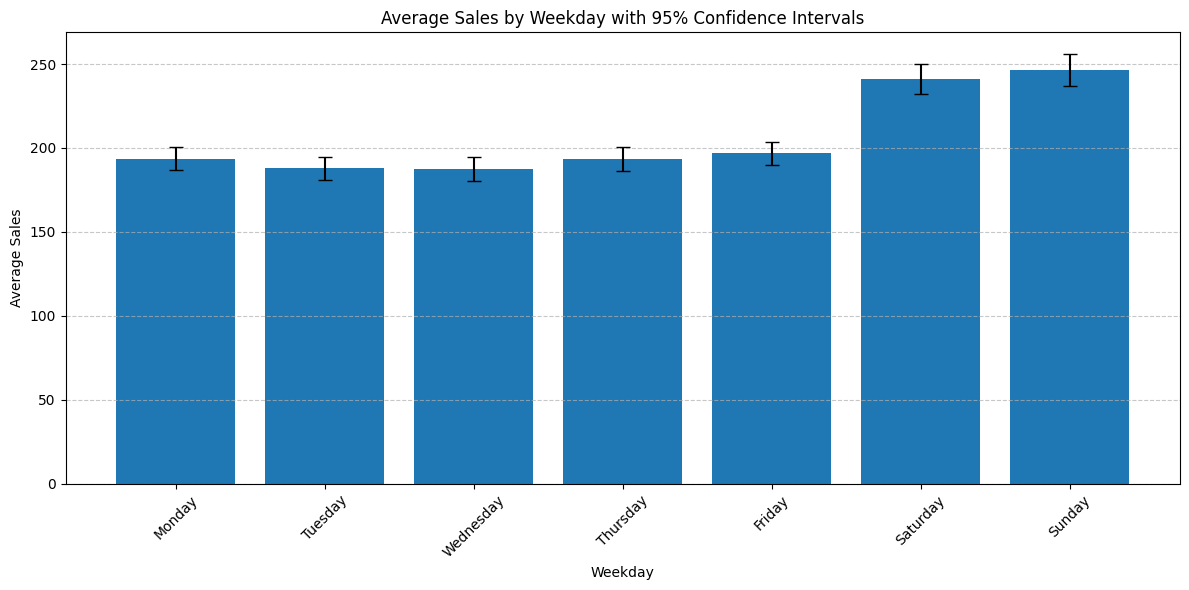

In [ ]:
# Define weekday order
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Sort data according to weekday order
weekday_means = weekday_means.reindex(weekday_order)
weekday_ci = weekday_ci.reindex(weekday_order)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(weekday_means.index, weekday_means.values)

# Add error bars for confidence intervals
plt.errorbar(
    x=range(len(weekday_means)),
    y=weekday_means.values,
    yerr=[
        (weekday_means - weekday_ci["ci_lower"]),
        (weekday_ci["ci_upper"] - weekday_means),
    ],
    fmt="none",
    color="black",
    capsize=5,
)

# Customize the plot
plt.title("Average Sales by Weekday (ordered) with 95% Confidence Intervals")
plt.xlabel("Weekday")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
